# Figure 1: Raw data visualization

## Library imports

If you are using this Jupyter notebook in **Binder** (the lightest version with already saved necessary data to reproduce the plots), we suggest to uncomment and run the cell below to install all necessary Python packages that you need to run this notebook. 

In [66]:
## Install all packages directly in the notebook
!pip install numpy pandas plotly alphatims holoviews psutil datashader pyarrow

If you would like to read the raw data on your local machine in the Jupyter notebook please uncomment and install additional packages to read the Thermo data.

> #### Installing pythonnet on Windows
    > it can be done just installing the pythonnet with pip

> #### Installing pythonnet on Ubuntu (Linux)
    > 1. sudo apt-get install build-essential
    > 2. Intall mono from mono project website [install mono on Linux](https://www.mono-project.com/download/stable/#download-lin)
    > 3. pip install pythonnet

> #### Installing pythonnet on MacOS
> 1. brew install pkg-config
> 2. Intall mono from mono project website;
> 3. "export PKG_CONFIG_PATH=/usr/local/lib/pkgconfig:/usr/lib/pkgconfig:/Library/Frameworks/Mono.framework/Versions/6.12.0/lib/pkgconfig:$PKG_CONFIG_PATH"; `or` add these PKG_CONFIG_PATH into ~./bash_profile, and run "source ~/bash_profile". 6.12.0 is my mono version
> 4. pip install pythonnet

In [ ]:
# only on Windows
# !pip install numba tqdm pythonnet

In [20]:
# import all necessary libraries
import pandas as pd
import numpy as np

import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import dynspread, rasterize, shade
import plotly.graph_objects as go

import utils
import alphatims.bruker

hv.extension('plotly')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Figure 1 A: TIC and BPI

For this figure we used the Thermo raw file from the [PXD012867 PRIDE project](https://www.ebi.ac.uk/pride/archive/projects/PXD012867). To reproduce this step on your PC please download the specified file from the PRIDE repository and change the path to it on your computer.

In [2]:
# # specify a path to the Thermo .raw file
# sample_path = '.../Data/PXD012867_yeast_project/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1.raw'

# # upload the thermo raw file
# data = load_thermo_raw(sample_path)

# # save ms1 separately 
# df_ms1 = pd.DataFrame({'scan': data['scan_list_ms1'], 
#                     'RT': data['rt_list_ms1'],
#                    'intensity': data['int_list_ms1'],
#                     'order': 'ms1'})

# # calculate summed and max intensity per each scan
# df_ms1['summed_intensity'] = df_ms1.intensity.apply(lambda x: sum(x))
# df_ms1['max_intensity'] = df_ms1.intensity.apply(lambda x: max(x))
# df_ms1.head()

> To simplify this step and enable to reproduce it on Binder, upload the dataframe `thermo_chrom_ms1` where information about MS1 scans and corresponding summed and max intensities are saved across the retention time were already saved into the parquet file for you. 

In [21]:
thermo_chrom_ms1 = pd.read_parquet('Data/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1_chrom', engine='pyarrow')
thermo_chrom_ms1.head()

scan        RT order  summed_intensity  max_intensity
0     1  0.002040   ms1         739489458       57035932
1    17  0.015798   ms1        2000855366      124119728
2    33  0.028040   ms1        1815002750      101905192
3    49  0.040419   ms1        2054335850      100841456
4    65  0.053017   ms1        1774525781      104155856

In [22]:
def plot_tic(
    df: pd.DataFrame, 
    title: str, 
    width: int = 900,
    height: int = 500
):
    """Create a total ion chromatogram (TIC) and Base Peak chromatogram (BPI) for the MS1 data.

    Parameters
    ----------
    df : pandas Dataframe
        A table with the extracted MS1 data.
    title : str
        The title of the plot.
    width : int
        The width of the plot.
        Default is 1000.
    height : int
        The height of the plot.
        Default is 320.

    Returns
    -------
    a Plotly line plot
        The line plot containing TIC and BPI for MS1 data of the provided dataset.
    """
    fig = go.Figure()
    
    total_ion_col = ['RT', 'summed_intensity']
    base_peak_col = ['RT', 'max_intensity']
    
    for chrom_type in ['TIC MS1', 'BPI MS1']:
        if chrom_type == 'TIC MS1':
            data = df[total_ion_col]
        elif chrom_type == 'BPI MS1':
            data = df[base_peak_col]
        fig.add_trace(
            go.Scatter(
                x=data.iloc[:, 0],
                y=data.iloc[:, 1],
                name=chrom_type,
                hovertemplate='<b>RT:</b> %{x};<br><b>Intensity:</b> %{y}.',
            )
        )
    
    fig.update_layout(
        title=dict(
            text=title,
            font=dict(
                size=16,
            ),
            x=0.5,
            xanchor='center',
            yanchor='top'
        ),
        xaxis=dict(
            title='RT, min',
            titlefont_size=14,
            tickmode = 'auto',
            tickfont_size=14,
        ),
        yaxis=dict(
            title='Intensity',
        ),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
        legend_title_text='Select:',
        hovermode="x",
        template="plotly_white",
        width=width,
        height=height
    )

    fig.update_xaxes(range=[0, df.RT.max()])
    return fig
    

In [23]:
plot_tic(thermo_chrom_ms1, 'Chromatogram').show(config=utils.config)

## Figure 1 B: MS1 map

For this figure we used the same file as for the Fig_1a (`20190124_QX3_JuSc_SA_JS7_1_wt_4h_1.raw` file from the [PXD012867 PRIDE project](https://www.ebi.ac.uk/pride/archive/projects/PXD012867)). 

In [112]:
# # specify a path to the Thermo .raw file
# sample_path = '.../Data/PXD012867_yeast_project/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1.raw'

# # upload the thermo raw file
# data = load_thermo_raw(sample_path)

# df = pd.DataFrame({
#     'scan': data['scan_list_ms1'], 
#     'RT': data['rt_list_ms1'], 
#     'mz': data['mass_list_ms1']
# })
# lst_col = 'mz'
# ms1 = pd.DataFrame({col:np.repeat(df[col].values, df[lst_col].str.len()) for col in df.columns.drop(lst_col)})
# ms1['mz'] = np.concatenate(data['mass_list_ms1'])
# ms1['intensity'] = np.concatenate(data['int_list_ms1'])
# ms1.head()

> To simplify this step and enable to reproduce it on Binder, upload the dataframe `thermo_ms1` where information about MS1 precursors (m/z and intensity) is already saved into the parquet files for you. 

In [108]:
thermo_ms1 = pd.read_parquet(
    ['Data/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1_ms1_part1',
     'Data/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1_ms1_part2'], 
    engine='pyarrow'
)
thermo_ms1.head()

RT          mz  intensity
0  0.00204  300.143433      60268
1  0.00204  300.160583      64932
2  0.00204  300.179596      51113
3  0.00204  300.476562      13740
4  0.00204  300.595093      24882

In [113]:
# this function is taken from the AlphaViz package (https://github.com/MannLabs/alphaviz) and modified
def plot_heatmap_ms1(
    df: pd.DataFrame,
    x_axis_label: str = "m/z, Th",
    y_axis_label: str = "RT, min",
    z_axis_label: str = "Intensity",
    title: str = "",
    width: int = 700,
    height: int = 400,
    background_color: str = "black",
    colormap: str = "fire",
):
    """Create a heatmap showing a correlation of m/z and ion mobility with color coding for signal intensity.

    Parameters
    ----------
    df : pandas Dataframe
        A dataframe obtained by slicing an alphatims.bruker.TimsTOF object.
    x_axis_label : str
        An x-axis label.
        Default is "m/z, Th".
    y_axis_label : str
        An y-axis label.
        Default is "Inversed IM, V·s·cm\u207B\u00B2".
    z_axis_label : str
        An z-axis label using for the coloring.
        Default is "Intensity".
    title: str
        The title of the plot.
         Default is "".
    width : int
        The width of the plot.
        Default is 700.
    height : int
        The height of the plot.
        Default is 400.
    background_color : str
        The background color of the plot.
        Default is "black".
    colormap : str
        The name of the colormap in Plotly.
        Default is "fire".

    Returns
    -------
    a Plotly scatter plot
        The scatter plot showing all found features in the specified rt and m/z ranges of the provided dataset.
    """
    labels = {
        'm/z, Th': "mz",
        'RT, min': "RT",
        'Inversed IM, V·s·cm\u207B\u00B2': "mobility_values",
        'Intensity': "intensity",
    }
    x_dimension = labels[x_axis_label]
    y_dimension = labels[y_axis_label]
    z_dimension = labels[z_axis_label]

    def hook(plot, element):
        plot.handles['layout']['xaxis']['gridcolor'] = background_color
        plot.handles['layout']['yaxis']['gridcolor'] = background_color

    opts_ms1=dict(
        width=width,
        height=height,
        title=title,
        xlabel=x_axis_label,
        ylabel=y_axis_label,
        bgcolor=background_color,
        hooks=[hook],
    )
    dmap = hv.DynamicMap(
        hv.Points(
            df,
            [x_dimension, y_dimension],
            z_dimension
        )
    )
    agg = rasterize(
        dmap,
        width=width,
        height=height,
        aggregator='sum'
    )
    fig = dynspread(
        shade(
            agg,
            cmap=colormap
        )
    ).opts(plot=opts_ms1)

    return fig

:DynamicMap   []
   :RGB   [mz,RT]   (R,G,B,A)
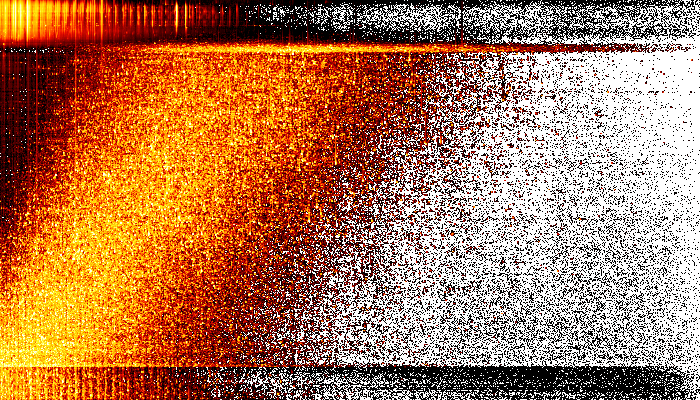

In [114]:
plot_heatmap_ms1(thermo_ms1, title='MS1 retention time map')

## Figure 1 C: XIC

Here we use the same data as for the figure 1b.
> To simplify this step and enable to reproduce it on Binder, upload the dataframe `thermo_ms1` where information about MS1 precursors (m/z and intensity) is already saved into the parquet files for you. 

In [115]:
thermo_ms1 = pd.read_parquet(
    ['Data/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1_ms1_part1',
     'Data/20190124_QX3_JuSc_SA_JS7_1_wt_4h_1_ms1_part2'], 
    engine='pyarrow'
)
thermo_ms1.head()

RT          mz  intensity
0  0.00204  300.143433      60268
1  0.00204  300.160583      64932
2  0.00204  300.179596      51113
3  0.00204  300.476562      13740
4  0.00204  300.595093      24882

In [119]:
def sum_binned_data(rt_values, intensity_values, min_value, max_value, bins):
    """ 
    Sum the intensities over retention time
    """
    bin_delta = (max_value - min_value) / bins
    bins_array = np.linspace(min_value, max_value, bins+1)
    rt_bins = ((rt_values - min_value) / bin_delta).astype(np.int64)
    intensity_bins = np.zeros(bins+1, dtype=np.int64)
    for rt_bin, intensity in zip(rt_bins, intensity_values):
        intensity_bins[rt_bin] += intensity
        bin_centers = bins_array[1:] - bin_delta/2
    return bin_centers, intensity_bins[1:]

In [117]:
def plot_xic(
    df: pd.DataFrame, 
    xic_mz: float,
    mz_tol_value: int,
    rt_min: float,
    rt_max: float,
    bins: int,
    width: int = 900,
    height: int = 500
):
    """Create an Extracted ion chromatogram (XIC) for the selected m/z.

    Parameters
    ----------
    df : pandas Dataframe
        A table with the extracted MS1 data.
    xic_mz : float
        An m/z value of the precursor/feature that should be used for the XIC.
    mz_tol_value : int
        An m/z tolerance value in ppm.
    rt_min : float
        Start of the retention time window.
    rt_max : float
        End of the retention time window.
    bins: int
        The number of bins for the plot's creation.
    width : int
        The width of the plot.
        Default is 900.
    height : int
        The height of the plot.
        Default is 500.

    Returns
    -------
    a Plotly line plot
        The line plot showing XIC for the selected m/z of the provided dataset.
    """
    fig = go.Figure()
    
    xic_mz_low_mz = xic_mz / (1 + mz_tol_value / 10**6)
    xic_mz_high_mz = xic_mz * (1 + mz_tol_value / 10**6)

    d = df[(df.mz >= xic_mz_low_mz) & (df.mz <= xic_mz_high_mz)]

    bin_centers, intensity_bins = sum_binned_data(d.RT, d.intensity, rt_min, rt_max, bins)
    
    fig.add_trace(
        go.Scatter(
            x=bin_centers,
            y=intensity_bins,
            hovertemplate='<b>RT:</b> %{x};<br><b>Intensity:</b> %{y}.',
        )
    )
    
    fig.update_layout(
        title=dict(
            text=f'XIC for the m/z = {xic_mz}, m/z tolerance = {mz_tol_value} ppm.',
            font=dict(
                size=16,
            ),
            x=0.5,
            xanchor='center',
            yanchor='top'
        ),
        xaxis=dict(
            title='RT, min',
            titlefont_size=14,
            tickmode = 'auto',
            tickfont_size=14,
        ),
        yaxis=dict(
            title='Intensity',
        ),
        hovermode="x",
        template="plotly_white",
        width=width,
        height=height
    )

    fig.update_xaxes(range=[0, df.RT.max()])
    return fig

In [120]:
# let's plot the XIC for the analyte with m/z = 457.997855 and m/z tolerance = 5 ppm
plot_xic(
    df=thermo_ms1, 
    xic_mz=457.997855, 
    mz_tol_value=5, 
    rt_min=0, 
    rt_max=thermo_ms1.RT.max(), 
    bins=300
).show(config=utils.config)

## Figure 1 D: m/z vs. IM heatmap

The Bruker raw file is used from the [Project PXD017703 from ProteomeXchange](https://www.ebi.ac.uk/pride/archive/projects/PXD017703).

To read the raw TIMS-TOF data we will use a recently published [AlphaTims package](https://github.com/MannLabs/alphatims).

In [15]:
file_path = '../Data/PXD017703_diaPASEF/20200428_Evosep_60SPD_SG06-16_MLHeLa_200ng_py8_S3-A6_1_2452.hdf'

In [16]:
raw_data = alphatims.bruker.TimsTOF(file_path)

In [17]:
# this function is taken from the AlphaViz package (https://github.com/MannLabs/alphaviz) and modified
def plot_heatmap(
    df: pd.DataFrame,
    x_axis_label: str = "m/z, Th",
    y_axis_label: str = "Inversed IM, V·s·cm\u207B\u00B2",
    z_axis_label: str = "Intensity",
    title: str = "",
    width: int = 700,
    height: int = 400,
    background_color: str = "black",
    colormap: str = "fire",
):
    """Create a heatmap showing a correlation of m/z and ion mobility with color coding for signal intensity.

    Parameters
    ----------
    df : pandas Dataframe
        A dataframe obtained by slicing an alphatims.bruker.TimsTOF object.
    x_axis_label : str
        An x-axis label.
        Default is "m/z, Th".
    y_axis_label : str
        An y-axis label.
        Default is "Inversed IM, V·s·cm\u207B\u00B2".
    z_axis_label : str
        An z-axis label using for the coloring.
        Default is "Intensity".
    title: str
        The title of the plot.
         Default is "".
    width : int
        The width of the plot.
        Default is 700.
    height : int
        The height of the plot.
        Default is 400.
    background_color : str
        The background color of the plot.
        Default is "black".
    colormap : str
        The name of the colormap in Plotly.
        Default is "fire".

    Returns
    -------
    a Plotly scatter plot
        The scatter plot showing all found features in the specified rt and m/z ranges of the provided dataset.
    """
    labels = {
        'm/z, Th': "mz_values",
        'RT, min': "rt_values",
        'Inversed IM, V·s·cm\u207B\u00B2': "mobility_values",
        'Intensity': "intensity_values",
    }
    x_dimension = labels[x_axis_label]
    y_dimension = labels[y_axis_label]
    z_dimension = labels[z_axis_label]

    df["rt_values"] /= 60

    def hook(plot, element):
        plot.handles['layout']['xaxis']['gridcolor'] = background_color
        plot.handles['layout']['yaxis']['gridcolor'] = background_color

    opts_ms1=dict(
        width=width,
        height=height,
        title=title,
        xlabel=x_axis_label,
        ylabel=y_axis_label,
        bgcolor=background_color,
        hooks=[hook],
    )
    dmap = hv.DynamicMap(
        hv.Points(
            df,
            [x_dimension, y_dimension],
            z_dimension
        )
    )
    agg = rasterize(
        dmap,
        width=width,
        height=height,
        aggregator='sum'
    )
    fig = dynspread(
        shade(
            agg,
            cmap=colormap
        )
    ).opts(plot=opts_ms1)

    return fig

In [18]:
raw_data[6004]

raw_indices  frame_indices  scan_indices  precursor_indices  \
0         279083635           6004            33                  0   
1         279083636           6004            35                  0   
2         279083637           6004            36                  0   
3         279083638           6004            36                  0   
4         279083639           6004            36                  0   
...             ...            ...           ...                ...   
379511    279463146           6004           916                  0   
379512    279463147           6004           916                  0   
379513    279463148           6004           917                  0   
379514    279463149           6004           917                  0   
379515    279463150           6004           917                  0   

        push_indices  tof_indices   rt_values  rt_values_min  mobility_values  \
0            5517709       211464  633.716165      10.561936         1.601114   
1            5517711       326378  633.716165      10.561936         1.598886   
2            5517712        35698  633.716165      10.561936         1.597771   
3            5517712        50307  633.716165      10.561936         1.597771   
4            5517712        64580  633.716165      10.561936         1.597771   
...              ...          ...         ...            ...              ...   
379511       5518592       182636  633.716165      10.561936         0.602828   
379512       5518592       253798  633.716165      10.561936         0.602828   
379513       5518593       184218  633.716165      10.561936         0.601681   
379514       5518593         6192  633.716165      10.561936         0.601681   
379515       5518593        75046  633.716165      10.561936         0.601681   

        quad_low_mz_values  quad_high_mz_values    mz_values  intensity_values  
0                     -1.0                 -1.0   694.773080                 9  
1                     -1.0                 -1.0  1252.148662                 9  
2                     -1.0                 -1.0   157.530243                 9  
3                     -1.0                 -1.0   187.655130                 9  
4                     -1.0                 -1.0   219.631055                 9  
...                    ...                  ...          ...               ...  
379511                -1.0                 -1.0   580.518001                73  
379512                -1.0                 -1.0   881.147624                93  
379513                -1.0                 -1.0   586.522010                78  
379514                -1.0                 -1.0   104.719141               100  
379515                -1.0                 -1.0   244.675914                 9  

[379516 rows x 13 columns]

:DynamicMap   []
   :RGB   [mz_values,mobility_values]   (R,G,B,A)
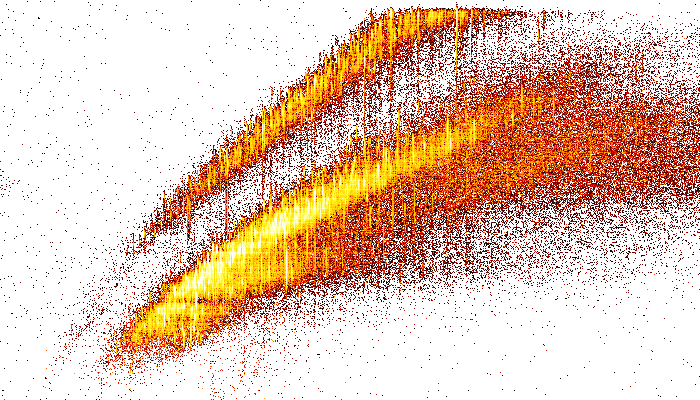

In [19]:
# this heatmap is generated for the MS1 frame № 6004 in the middle of the gradient
plot_heatmap(raw_data[6004], title='MS1 ion mobility heatmap')

## Additional figure: MS1 feature map

This plot is not included in the manuscript but could be generated using the MaxQuant output features file.

In [121]:
# path_to_features_mq_file = '../Data/20190402_QX1_SeVW_MA_HeLa_500ng_LC11.features.tsv'

In [122]:
# features = pd.read_csv(path_to_features_mq_file, sep='\t')
# features['id'] = features.index
# features.head()

mz  mostAbundantMz  charge   rtStart    rtApex     rtEnd      fwhm  \
0  401.848359      401.848359       3  1.407345  1.437862  1.485042  0.087918   
1  414.837956      414.837956       1  1.376529  1.450545  1.523679  0.263146   
2  476.198018      476.198018       1  1.376529  1.435587  1.488920  0.499391   
3  493.838298      493.838298       1  1.416147  1.445596  1.485042  0.025322   
4  550.216764      550.216764       1  1.420375  1.455440  1.531359  0.126799   

   nIsotopes  nScans  averagineCorr         mass    massCalib  intensityApex  \
0          2      19       0.758352  1202.515967  1202.515603  333899.279297   
1          2      37       0.999643   413.830402   413.830372  412544.174316   
2          3      28       0.973631   475.188811   475.188842  741800.526855   
3          2      13       0.964025   492.830950   492.830919  244041.166626   
4          3      28       0.997846   549.208431   549.208429  482958.627930   

   intensitySum  id  
0  5.775192e+06   0  
1  1.262690e+07   1  
2  1.798006e+07   2  
3  3.760315e+06   3  
4  1.512900e+07   4

Upload the raw data.

In [ ]:
# # specify a path to the Thermo .raw file
# path_to_raw_file = '../Data/20190402_QX1_SeVW_MA_HeLa_500ng_LC11.raw'

# # upload the thermo raw file
# data_f = load_thermo_raw(path_to_raw_file)

# df = pd.DataFrame({
#     'scan': data_f['scan_list_ms1'], 
#     'RT': data_f['rt_list_ms1'], 
#     'mz': data_f['mass_list_ms1']
# })
# lst_col = 'mz'
# ms1 = pd.DataFrame({col:np.repeat(df[col].values, df[lst_col].str.len()) for col in df.columns.drop(lst_col)})
# ms1['mz'] = np.concatenate(data_f['mass_list_ms1'])
# ms1['intensity'] = np.concatenate(data_f['int_list_ms1'])
# ms1.head()

In [123]:
def plot_features_map(
    ms1: pd.DataFrame,
    features: pd.DataFrame,
    rt_range: tuple,
    mz_range: tuple,
    mz_tol_ppm: int = 2,
    title: str = "Feature map",
    width: int = 850,
    height: int = 550
):
    """Create a feature map for the selected m/z and RT ranges.

    Parameters
    ----------
    ms1 : pandas Dataframe
        A table with the extracted MS1 data.
    features : pandas Dataframe
        A table of features found by MaxQuant.
    rt_range : tuple
        Start and end of the retention time range.
    mz_range : tuple
        Start and end of m/z range.
    mz_tol_ppm : int
        An m/z tolerance value in ppm.
    title: str
        The title of the plot.
         Default is "Feature map".
    width : int
        The width of the plot.
        Default is 850.
    height : int
        The height of the plot.
        Default is 550.

    Returns
    -------
    a Plotly scatter plot
        The scatter plot showing all found features in the specified rt and m/z ranges of the provided dataset.
    """
    # slice the raw data
    ms1_sliced = ms1[
        (ms1.mz >= mz_range[0]) & \
        (ms1.mz <= mz_range[1]) & \
        (ms1.RT >= rt_range[0]) & \
        (ms1.RT <= rt_range[1])
    ]
    ms1_sliced['id'] = -1
    
    # filter the features and assign the feature id to the raw data
    for feat in features[
        (features.mz >= mz_range[0]) & \
        (features.mz <= mz_range[1]) & \
        (features.rtStart >= rt_range[0]) & \
        (features.rtEnd <= rt_range[1])
    ].itertuples():
        mz_low = feat.mz / (1 + mz_tol_ppm / 10**6)
        mz_high = feat.mz * (1 + mz_tol_ppm / 10**6)
        ms1_sliced.loc[
            (ms1_sliced.mz >= mz_low) & \
            (ms1_sliced.mz <= mz_high) & \
            (ms1_sliced.RT >= feat.rtStart) & \
            (ms1_sliced.RT <= feat.rtEnd), 
            'id'
        ] = feat.id
    
#     fig = px.scatter(d, x='mz', y='RT', color='id', color_discrete_sequence=["red", "blue"])
    
    fig = go.Figure()

    fig.add_trace(
        go.Scatter(
            x=ms1_sliced[ms1_sliced.id == -1].mz,
            y=ms1_sliced[ms1_sliced.id == -1].RT,
            mode='markers',
            marker=dict(color='lightgrey', size=4),
            hovertext=ms1_sliced[ms1_sliced.id == -1].intensity,
            hovertemplate='<b>m/z:</b> %{x};<br><b>RT:</b> %{y};<br><b>Intensity:</b> %{hovertext}.',
            name='',
            showlegend=False
        )
    )

    for feat in ms1_sliced.id.unique():
        if feat != -1:
            fig.add_trace(
                go.Scatter(
                    x=ms1_sliced[ms1_sliced.id == feat].mz,
                    y=ms1_sliced[ms1_sliced.id == feat].RT,
                    mode='markers',
                    marker=dict(size=4),
                    hovertext=ms1_sliced[ms1_sliced.id == -1].intensity,
                    hovertemplate='<b>m/z:</b> %{x};<br><b>RT:</b> %{y};<br><b>Intensity:</b> %{hovertext}.',
                    name='',
                    showlegend=False
                )
            )
    
    fig.update_layout(
        title=dict(
            text=title,
            font=dict(
                size=16,
            ),
            x=0.5,
            y=0.88,
            xanchor='center',
#             yanchor='middle'
        ),
        xaxis=dict(
            title='m/z, Th',
            titlefont_size=14,
            tickmode = 'auto',
            tickfont_size=14,
        ),
        yaxis=dict(
            title='RT, min',
        ),
        hovermode="closest",
        template="plotly_white",
        width=width,
        height=height
    )
    
    return fig

Specify the range to show the plot in retention time and m/z dimensions.

In [126]:
# plot_features_map(ms1=ms1, features=features, rt_range=(54, 56), mz_range=(457, 459)).show(config=utils.config)
# at the center of the plot we see a feature with m/z ~ 457.997855